In [3]:
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='ignore')
import pickle

In [4]:
import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    plt.rcParams["font.family"] = 'AppleGothic'

elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rcParams["font.family"] = font_name
elif platform.system() == 'Linux':
    plt.rcParams['font.family'] = 'NanumGothic'


plt.rcParams['axes.unicode_minus'] = False

In [4]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns', 500)

## Data Load

In [5]:
train_df = pd.read_csv('./train.csv')

## Data Analysis

In [6]:
train_df

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22,X_23,X_24,X_25,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33,X_34,X_35,X_36,X_37,X_38,X_39,X_40,X_41,X_42,X_43,X_44,X_45,X_46,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,X_57,X_58,X_59,X_60,X_61,X_62,X_63,X_64,X_65,X_66,X_67,X_68,X_69,X_70,X_71,X_72,X_73,X_74,X_75,X_76,X_77,X_78,X_79,X_80,X_81,X_82,X_83,X_84,X_85,X_86,X_87,X_88,X_89,X_90,X_91,X_92,X_93,X_94,X_95,X_96,X_97,X_98,X_99,X_100,X_101,X_102,X_103,X_104,X_105,X_106,X_107,X_108,X_109,X_110,X_111,X_112,X_113,X_114,X_115,X_116,X_117,X_118,X_119,X_120,X_121,X_122,X_123,X_124,X_125,X_126,X_127,X_128,X_129,X_130,X_131,X_132,X_133,X_134,X_135,X_136,X_137,X_138,X_139,X_140,X_141,X_142,X_143,X_144,X_145,X_146,X_147,X_148,X_149,X_150,X_151,X_152,X_153,X_154,X_155,X_156,X_157,X_158,X_159,X_160,X_161,X_162,X_163,X_164,X_165,X_166,X_167,X_168,X_169,X_170,X_171,X_172,X_173,X_174,X_175,X_176,X_177,X_178,X_179,X_180,X_181,X_182,X_183,X_184,X_185,X_186,X_187,X_188,X_189,X_190,X_191,X_192,X_193,X_194,X_195,X_196,X_197,X_198,X_199,X_200,X_201,X_202,X_203,X_204,X_205,X_206,X_207,X_208,X_209,X_210,X_211,X_212,X_213,X_214,X_215,X_216,X_217,X_218,X_219,X_220,X_221,X_222,X_223,X_224,X_225,X_226,X_227,X_228,X_229,X_230,X_231,X_232,X_233,X_234,X_235,X_236,X_237,X_238,X_239,X_240,X_241,X_242,X_243,X_244,...,X_2626,X_2627,X_2628,X_2629,X_2630,X_2631,X_2632,X_2633,X_2634,X_2635,X_2636,X_2637,X_2638,X_2639,X_2640,X_2641,X_2642,X_2643,X_2644,X_2645,X_2646,X_2647,X_2648,X_2649,X_2650,X_2651,X_2652,X_2653,X_2654,X_2655,X_2656,X_2657,X_2658,X_2659,X_2660,X_2661,X_2662,X_2663,X_2664,X_2665,X_2666,X_2667,X_2668,X_2669,X_2670,X_2671,X_2672,X_2673,X_2674,X_2675,X_2676,X_2677,X_2678,X_2679,X_2680,X_2681,X_2682,X_2683,X_2684,X_2685,X_2686,X_2687,X_2688,X_2689,X_2690,X_2691,X_2692,X_2693,X_2694,X_2695,X_2696,X_2697,X_2698,X_2699,X_2700,X_2701,X_2702,X_2703,X_2704,X_2705,X_2706,X_2707,X_2708,X_2709,X_2710,X_2711,X_2712,X_2713,X_2714,X_2715,X_2716,X_2717,X_2718,X_2719,X_2720,X_2721,X_2722,X_2723,X_2724,X_2725,X_2726,X_2727,X_2728,X_2729,X_2730,X_2731,X_2732,X_2733,X_2734,X_2735,X_2736,X_2737,X_2738,X_2739,X_2740,X_2741,X_2742,X_2743,X_2744,X_2745,X_2746,X_2747,X_2748,X_2749,X_2750,X_2751,X_2752,X_2753,X_2754,X_2755,X_2756,X_2757,X_2758,X_2759,X_2760,X_2761,X_2762,X_2763,X_2764,X_2765,X_2766,X_2767,X_2768,X_2769,X_2770,X_2771,X_2772,X_2773,X_2774,X_2775,X_2776,X_2777,X_2778,X_2779,X_2780,X_2781,X_2782,X_2783,X_2784,X_2785,X_2786,X_2787,X_2788,X_2789,X_2790,X_2791,X_2792,X_2793,X_2794,X_2795,X_2796,X_2797,X_2798,X_2799,X_2800,X_2801,X_2802,X_2803,X_2804,X_2805,X_2806,X_2807,X_2808,X_2809,X_2810,X_2811,X_2812,X_2813,X_2814,X_2815,X_2816,X_2817,X_2818,X_2819,X_2820,X_2821,X_2822,X_2823,X_2824,X_2825,X_2826,X_2827,X_2828,X_2829,X_2830,X_2831,X_2832,X_2833,X_2834,X_2835,X_2836,X_2837,X_2838,X_2839,X_2840,X_2841,X_2842,X_2843,X_2844,X_2845,X_2846,X_2847,X_2848,X_2849,X_2850,X_2851,X_2852,X_2853,X_2854,X_2855,X_2856,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7813.0,7813.0,NaN,NaN,0.19,0.20,0.19,0.2,228.0,228.0,225.0,582.9,587.1,567.3,0.0,0.0,249.96,249.99,247.46,250.0,428.0,435.0,426.0,179.9,180.0,179.9,180.0,215.0,215.0,214.9,215.0,214.9,215.0,214.9,215.0,209.9,210.0,209.9,210.0,209.9,210.0,209.9,210.0,205.0,205.0,204.9,205.

### 각 column들의 널 값의 분포 알아보기

In [7]:
train_df.isnull().sum() #충분히 알아볼 수 없음

PRODUCT_ID      0
Y_Class         0
Y_Quality       0
TIMESTAMP       0
LINE            0
             ... 
X_2871        499
X_2872        598
X_2873        598
X_2874        598
X_2875        598
Length: 2881, dtype: int64

In [8]:
#그룹화해서 집계로 분포 알아보기
train_df.groupby('PRODUCT_CODE').count()

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,X_16,X_17,X_18,X_19,X_20,X_21,X_22,X_23,X_24,X_25,X_26,X_27,X_28,X_29,X_30,X_31,X_32,X_33,X_34,X_35,X_36,X_37,X_38,X_39,X_40,X_41,X_42,X_43,X_44,X_45,X_46,X_47,X_48,X_49,X_50,X_51,X_52,X_53,X_54,X_55,X_56,X_57,X_58,X_59,X_60,X_61,X_62,X_63,X_64,X_65,X_66,X_67,X_68,X_69,X_70,X_71,X_72,X_73,X_74,X_75,X_76,X_77,X_78,X_79,X_80,X_81,X_82,X_83,X_84,X_85,X_86,X_87,X_88,X_89,X_90,X_91,X_92,X_93,X_94,X_95,X_96,X_97,X_98,X_99,X_100,X_101,X_102,X_103,X_104,X_105,X_106,X_107,X_108,X_109,X_110,X_111,X_112,X_113,X_114,X_115,X_116,X_117,X_118,X_119,X_120,X_121,X_122,X_123,X_124,X_125,X_126,X_127,X_128,X_129,X_130,X_131,X_132,X_133,X_134,X_135,X_136,X_137,X_138,X_139,X_140,X_141,X_142,X_143,X_144,X_145,X_146,X_147,X_148,X_149,X_150,X_151,X_152,X_153,X_154,X_155,X_156,X_157,X_158,X_159,X_160,X_161,X_162,X_163,X_164,X_165,X_166,X_167,X_168,X_169,X_170,X_171,X_172,X_173,X_174,X_175,X_176,X_177,X_178,X_179,X_180,X_181,X_182,X_183,X_184,X_185,X_186,X_187,X_188,X_189,X_190,X_191,X_192,X_193,X_194,X_195,X_196,X_197,X_198,X_199,X_200,X_201,X_202,X_203,X_204,X_205,X_206,X_207,X_208,X_209,X_210,X_211,X_212,X_213,X_214,X_215,X_216,X_217,X_218,X_219,X_220,X_221,X_222,X_223,X_224,X_225,X_226,X_227,X_228,X_229,X_230,X_231,X_232,X_233,X_234,X_235,X_236,X_237,X_238,X_239,X_240,X_241,X_242,X_243,X_244,X_245,...,X_2626,X_2627,X_2628,X_2629,X_2630,X_2631,X_2632,X_2633,X_2634,X_2635,X_2636,X_2637,X_2638,X_2639,X_2640,X_2641,X_2642,X_2643,X_2644,X_2645,X_2646,X_2647,X_2648,X_2649,X_2650,X_2651,X_2652,X_2653,X_2654,X_2655,X_2656,X_2657,X_2658,X_2659,X_2660,X_2661,X_2662,X_2663,X_2664,X_2665,X_2666,X_2667,X_2668,X_2669,X_2670,X_2671,X_2672,X_2673,X_2674,X_2675,X_2676,X_2677,X_2678,X_2679,X_2680,X_2681,X_2682,X_2683,X_2684,X_2685,X_2686,X_2687,X_2688,X_2689,X_2690,X_2691,X_2692,X_2693,X_2694,X_2695,X_2696,X_2697,X_2698,X_2699,X_2700,X_2701,X_2702,X_2703,X_2704,X_2705,X_2706,X_2707,X_2708,X_2709,X_2710,X_2711,X_2712,X_2713,X_2714,X_2715,X_2716,X_2717,X_2718,X_2719,X_2720,X_2721,X_2722,X_2723,X_2724,X_2725,X_2726,X_2727,X_2728,X_2729,X_2730,X_2731,X_2732,X_2733,X_2734,X_2735,X_2736,X_2737,X_2738,X_2739,X_2740,X_2741,X_2742,X_2743,X_2744,X_2745,X_2746,X_2747,X_2748,X_2749,X_2750,X_2751,X_2752,X_2753,X_2754,X_2755,X_2756,X_2757,X_2758,X_2759,X_2760,X_2761,X_2762,X_2763,X_2764,X_2765,X_2766,X_2767,X_2768,X_2769,X_2770,X_2771,X_2772,X_2773,X_2774,X_2775,X_2776,X_2777,X_2778,X_2779,X_2780,X_2781,X_2782,X_2783,X_2784,X_2785,X_2786,X_2787,X_2788,X_2789,X_2790,X_2791,X_2792,X_2793,X_2794,X_2795,X_2796,X_2797,X_2798,X_2799,X_2800,X_2801,X_2802,X_2803,X_2804,X_2805,X_2806,X_2807,X_2808,X_2809,X_2810,X_2811,X_2812,X_2813,X_2814,X_2815,X_2816,X_2817,X_2818,X_2819,X_2820,X_2821,X_2822,X_2823,X_2824,X_2825,X_2826,X_2827,X_2828,X_2829,X_2830,X_2831,X_2832,X_2833,X_2834,X_2835,X_2836,X_2837,X_2838,X_2839,X_2840,X_2841,X_2842,X_2843,X_2844,X_2845,X_2846,X_2847,X_2848,X_2849,X_2850,X_2851,X_2852,X_2853,X_2854,X_2855,X_2856,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
PRODUCT_CODE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
A_31,249,249,249,249,249,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,78,78,42,42,120,120,120,120,120,120,120,120,12

위의 결과로 A제품에 쓰이는 column들과 O제품과 T제품에 쓰이는 column들이 상이함을 알 수 있다.

In [9]:
train_df.groupby(['PRODUCT_CODE', 'LINE']).count()

PRODUCT_ID  Y_Class  Y_Quality  TIMESTAMP  X_1  X_2  \
PRODUCT_CODE LINE                                                           
A_31         T010305          59       59         59         59    0    0   
             T010306          70       70         70         70    0    0   
             T050304          78       78         78         78    0    0   
             T050307          42       42         42         42    0    0   
O_31         T100304           3        3          3          3    3    3   
             T100306           3        3          3          3    3    3   
T_31         T100304         172      172        172        172  172  172   
             T100306         171      171        171        171  171  171   

                      X_3  X_4  X_5  X_6  X_7  X_8  X_9  X_10  X_11  X_12  \
PRODUCT_CODE LINE                                                           
A_31         T010305    0    0    0    0    0    0    0     0     0     0   
             T010306    0    0    0    0    0    0    0     0     0     0   
             T050304    0    0    0    0    0    0    0     0     0     0   
             T050307    0    0    0    0    0    0    0     0     0     0   
O_31         T100304    3    3    3    3    3    3    3     3     3     3   
             T100306    3    3    3    3    3    3    3     3     3     3   
T_31         T100304  172  172  172  172  172  172  172   172   172   172   
             T100306  171  171  171  171  171  171  171   171   171   171   

                      X_13  X_14  X_15  X_16  X_17  X_18  X_19  X_20  X_21  \
PRODUCT_CODE LINE                                                            
A_31         T010305     0     0     0     0     0     0     0     0     0   
             T010306     0     0     0     0     0     0     0     0     0   
             T050304     0     0     0     0     0     0     0     0     0   
             T050307     0     0     0     0     0     0     0     0     0   
O_31         T100304     3     3     3     3     3     3     3     3     3   
             T100306     3     3     3     3     3     3     3     3     3   
T_31         T100304   172   172   172   172   172   172   172   172   172   
             T100306   171   171   171   171   171   171   171   171   171   

                      X_22  X_23  X_24  X_25  X_26  X_27  X_28  X_29  X_30  \
PRODUCT_CODE LINE                                                            
A_31         T010305     0     0     0     0     0     0     0     0     0   
             T010306     0     0     0     0     0     0     0     0     0   
             T050304     0     0     0     0     0     0     0     0     0   
             T050307     0     0     0     0     0     0     0     0     0   
O_31         T100304     3     3     3     3     3     3     3     3     3   
             T100306     3     3     3     3     3     3     3     3     3   
T_31         T100304   172   172   172   172   172   172   172   172   172   
             T100306   171   171   171   171   171   171   171   171   171   

                      X_31  X_32  X_33  X_34  X_35  X_36  X_37  X_38  X_39  \
PRODUCT_CODE LINE                                                            
A_31         T010305     0     0     0     0     0     0     0     0     0   
             T010306     0     0     0     0     0     0     0     0     0   
             T050304     0     0     0     0     0     0     0     0     0   
             T050307     0     0     0     0     0     0     0     0     0   
O_31         T100304     3     3     3     3     3     3     3     3     3   
             T100306     3     3     3     3     3     3     3     3     3   
T_31         T100304   172   172   172   172   172   172   172   172   172   
             T100306   171   171   171   171   171   171   171   171   171   

                      X_40  X_41  X_42  X_43  X_44  X_45  X_46  X_47  X_48  \
PRODUCT_CODE LINE                                          

#### 해당 결과를 시각적으로 나타내기

각 제품별 개수를 세서 각 column마다 grouped bar plot

In [10]:
train_dfc = train_df.iloc[:, 6:]
product_A = train_dfc[train_df['PRODUCT_CODE']=='A_31'].count()
product_O = train_dfc[train_df['PRODUCT_CODE']=='O_31'].count()
product_T = train_dfc[train_df['PRODUCT_CODE']=='T_31'].count()

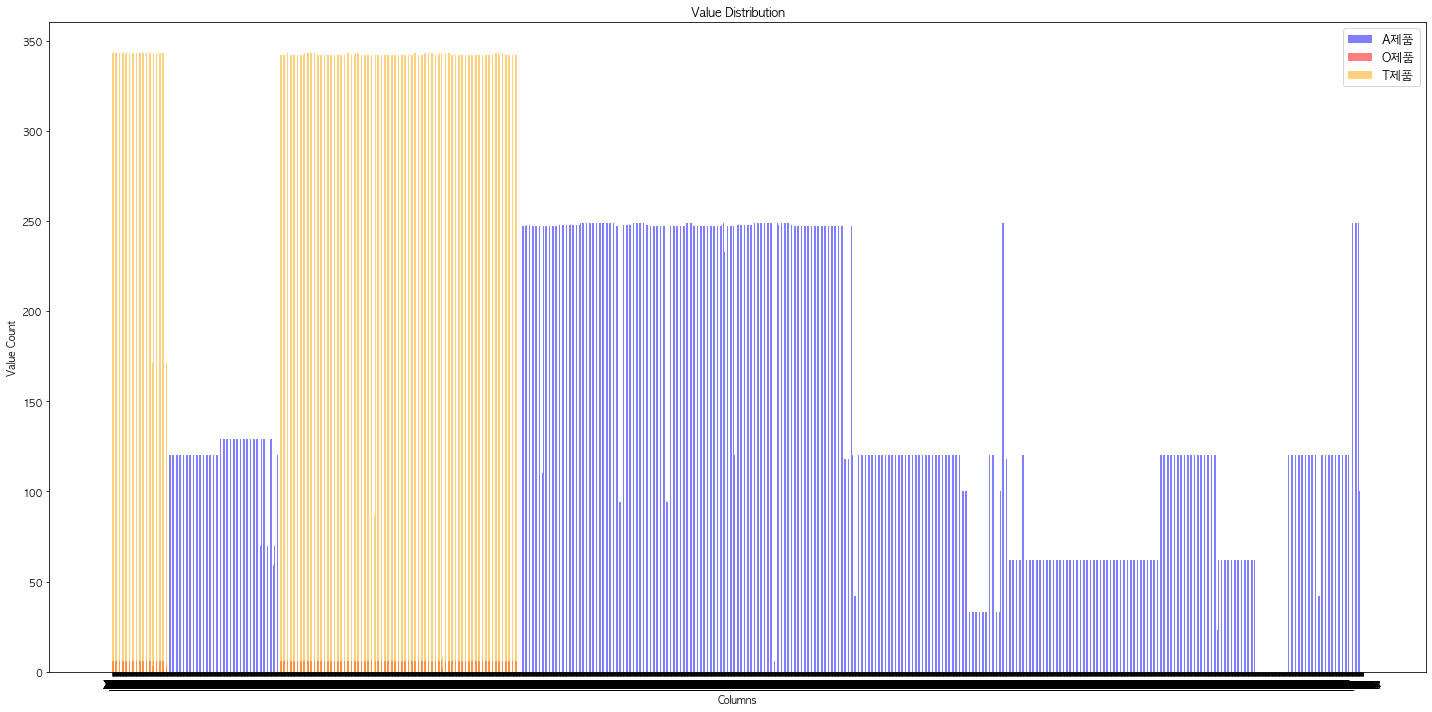

In [11]:
fig, ax = plt.subplots(figsize=(20,10))

x_indexes = np.arange(train_dfc.shape[1]) 

bar_width = 0.5
#ax.set_ylim([100,350])

ax.bar(x_indexes, 
       product_A, 
       width=bar_width, 
       color='blue', 
       alpha=0.5,
       label='A제품')

ax.bar(x_indexes, 
       product_O, 
       width=bar_width, 
       color='red', 
       alpha=0.5,
       label='O제품')

ax.bar(x_indexes, 
       product_T, 
       width=bar_width, 
       color='orange', 
       alpha=0.5,
       label='T제품')

ax.set_xticks(ticks=x_indexes, labels=train_dfc.columns)
ax.set_xlabel("Columns")
ax.set_ylabel("Value Count")
ax.set_title("Value Distribution")

ax.legend(fontsize = 'large')
plt.tight_layout()

#### column의 수가 너무 많아 시각화 자료가 보기 어려우므로 100~150번째 column들만 가져와서 데이터 시각화 진행

In [32]:
train_dfc_100 = train_df.iloc[:, 100:156]
product_A100 = train_df.iloc[:, 100:156][train_df['PRODUCT_CODE']=='A_31'].count()
product_O100 = train_df.iloc[:, 100:156][train_df['PRODUCT_CODE']=='O_31'].count()
product_T100 = train_df.iloc[:, 100:156][train_df['PRODUCT_CODE']=='T_31'].count()

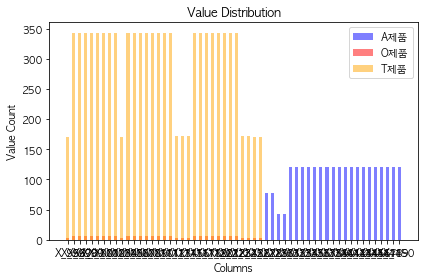

In [39]:
fig, ax = plt.subplots(figsize=(6,4))

x_indexes = np.arange(train_dfc_100.shape[1]) 

bar_width = 0.5
#ax.set_ylim([100,350])

ax.bar(x_indexes, 
       product_A100, 
       width=bar_width, 
       color='blue', 
       alpha=0.5,
       label='A제품')

ax.bar(x_indexes, 
       product_O100, 
       width=bar_width, 
       color='red', 
       alpha=0.5,
       label='O제품')

ax.bar(x_indexes, 
       product_T100, 
       width=bar_width, 
       color='orange', 
       alpha=0.5,
       label='T제품')

ax.set_xticks(ticks=x_indexes, labels=train_dfc_100.columns)
ax.set_xlabel("Columns")
ax.set_ylabel("Value Count")
ax.set_title("Value Distribution")

ax.legend()
plt.tight_layout()

-> 빨강과 주황색의 O, T제품의 값이 기록된 column들이 같은 경향을 보인다.

-> 그에 비해, A제품의 값이 기록된 column들은 O, T제품의 column들과 상이함.

#### column의 수가 너무 많아 시각화 자료를 보기 어려우므로 500~600번째 column들만 가져와서 데이터 시각화 진행

In [40]:
train_dfc_500 = train_df.iloc[:, 500:600]
product_A500 = train_df.iloc[:, 500:600][train_df['PRODUCT_CODE']=='A_31'].count()
product_O500 = train_df.iloc[:, 500:600][train_df['PRODUCT_CODE']=='O_31'].count()
product_T500 = train_df.iloc[:, 500:600][train_df['PRODUCT_CODE']=='T_31'].count()

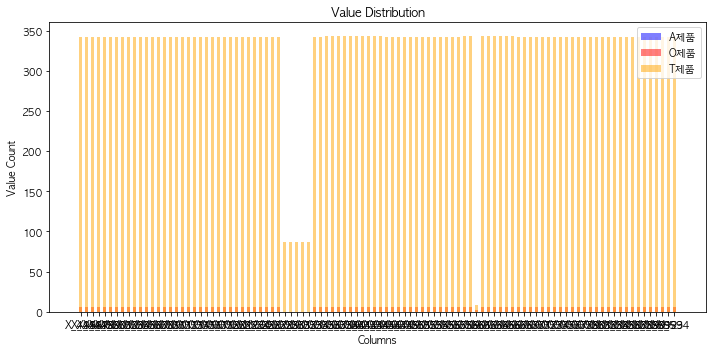

In [43]:
fig, ax = plt.subplots(figsize=(10,5))

x_indexes = np.arange(train_dfc_500.shape[1]) 

bar_width = 0.5
#ax.set_ylim([100,350])

ax.bar(x_indexes, 
       product_A500, 
       width=bar_width, 
       color='blue', 
       alpha=0.5,
       label='A제품')

ax.bar(x_indexes, 
       product_O500, 
       width=bar_width, 
       color='red', 
       alpha=0.5,
       label='O제품')

ax.bar(x_indexes, 
       product_T500, 
       width=bar_width, 
       color='orange', 
       alpha=0.5,
       label='T제품')

ax.set_xticks(ticks=x_indexes, labels=train_dfc_500.columns)
ax.set_xlabel("Columns")
ax.set_ylabel("Value Count")
ax.set_title("Value Distribution")

ax.legend()
plt.tight_layout()

-> O제품과 T제품이 기록되는 column들이 완벽히 일치하지는 않는다.

#### column의 수가 너무 많아 시각화 자료를 보기 어려우므로 2500~2875번째 column들만 가져와서 데이터 시각화 진행

In [45]:
train_dfc_2500 = train_df.iloc[:, 2500:]
product_A2500 = train_df.iloc[:, 2500:][train_df['PRODUCT_CODE']=='A_31'].count()
product_O2500 = train_df.iloc[:, 2500:][train_df['PRODUCT_CODE']=='O_31'].count()
product_T2500 = train_df.iloc[:, 2500:][train_df['PRODUCT_CODE']=='T_31'].count()

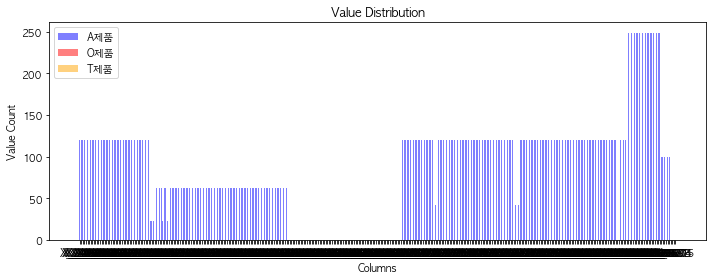

In [48]:
fig, ax = plt.subplots(figsize=(10,4))

x_indexes = np.arange(train_dfc_2500.shape[1])

bar_width = 0.5
#ax.set_ylim([100,350])

ax.bar(x_indexes, 
       product_A2500, 
       width=bar_width, 
       color='blue', 
       alpha=0.5,
       label='A제품')

ax.bar(x_indexes, 
       product_O2500, 
       width=bar_width, 
       color='red', 
       alpha=0.5,
       label='O제품')

ax.bar(x_indexes, 
       product_T2500, 
       width=bar_width, 
       color='orange', 
       alpha=0.5,
       label='T제품')

ax.set_xticks(ticks=x_indexes, labels=train_dfc_2500.columns)
ax.set_xlabel("Columns")
ax.set_ylabel("Value Count")
ax.set_title("Value Distribution")

ax.legend()
plt.tight_layout()

-> 어떠한 제품도 값이 기록되지 않는 column들이 있다.

In [7]:
train_amode = pd.read_csv('./data/train_amode.csv')
train_amode

,X_128,X_129,X_130,X_132,X_133,X_134,X_135,X_136,X_137,X_138,...,X_2861,X_2862,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870
0,7813.0,7813.0,806.0,0.19,0.20,0.19,0.2,228.0,228.0,225.0,...,197.286667,189.0,383.0,368.296296,353.0,39.34,40.89,32.56,34.09,77.77
1,837.0,837.0,19854.0,0.20,0.21,0.20,0.2,413.0,414.0,414.0,...,193.296552,185.6,383.0,367.735849,353.0,38.89,42.82,43.92,35.34,72.55
2,7815.0,7815.0,806.0,0.19,0.20,0.19,0.2,228.0,228.0,225.0,...,179.820690,165.5,383.0,367.320755,353.0,39.19,36.65,42.47,36.53,78.35
3,837.0,837.0,19856.0,0.20,0.21,0.20,0.2,414.0,414.0,414.0,...,181.920690,165.8,384.0,369.188679,353.0,37.74,39.17,52.17,30.58,71.78
4,7817.0,7817.0,806.0,0.19,0.20,0.18,0.2,228.0,228.0,225.0,...,196.393333,182.6,383.0,367.351852,352.0,38.70,41.89,46.93,33.09,76.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,11920.0,11920.0,806.0,0.19,0.20,0.19,0.2,230.0,230.0,230.0,...,191.993103,181.6,394.0,371.943396,353.0,51.71,59.64,54.61,57.05,63.18
245,837.0,837.0,806.0,0.20,0.21,0.20,0.2,228.0,228.0,225.0,...,195.682143,184.9,466.0,448.634615,432.0,53.49,51.25,40.49,55.31,62.83
246,837.0,837.0,806.0,0.20,0.21,0.20,0.2,228.0,228.0,225.0,...,187.396552,176.7,472.0,450.339623,432.0,53.49,51.25,40.49,55.31,62.83
247,14810.0,14810.0,806.0,0.19,0.20,0.19,0.2,304.0,304.0,304.0,...,180.810345,168.7,384.0,369.811321,353.0,49.47,53.07,50.89,55.10,66.49


In [27]:
train_amode.X_135.unique()

array([0.2])

In [28]:
train_amode.X_142.unique()

array([0.])

In [29]:
train_amode.X_145.unique()

array([249.99])

In [30]:
train_amode.X_147.unique()

array([250.])

In [1]:
#메모리 부족할 때 캐시지우기!
!jupyter nbconvert --clear-output --inplace 1_데이터시각화.ipynb

[NbConvertApp] Converting notebook 1_데이터시각화.ipynb to notebook
[NbConvertApp] Writing 15587 bytes to 1_데이터시각화.ipynb


### 최빈값 중앙값 결측치 처리 비교

In [16]:
train_amode = pd.read_csv('./data/train_amode.csv')
train_amedi = pd.read_csv('./data/train_amedi.csv')

In [17]:
train_a = pd.read_csv('./data/train_a.csv')

In [22]:
df_comp = pd.concat([train_a[['Y_Class']],train_amode], axis = 1)

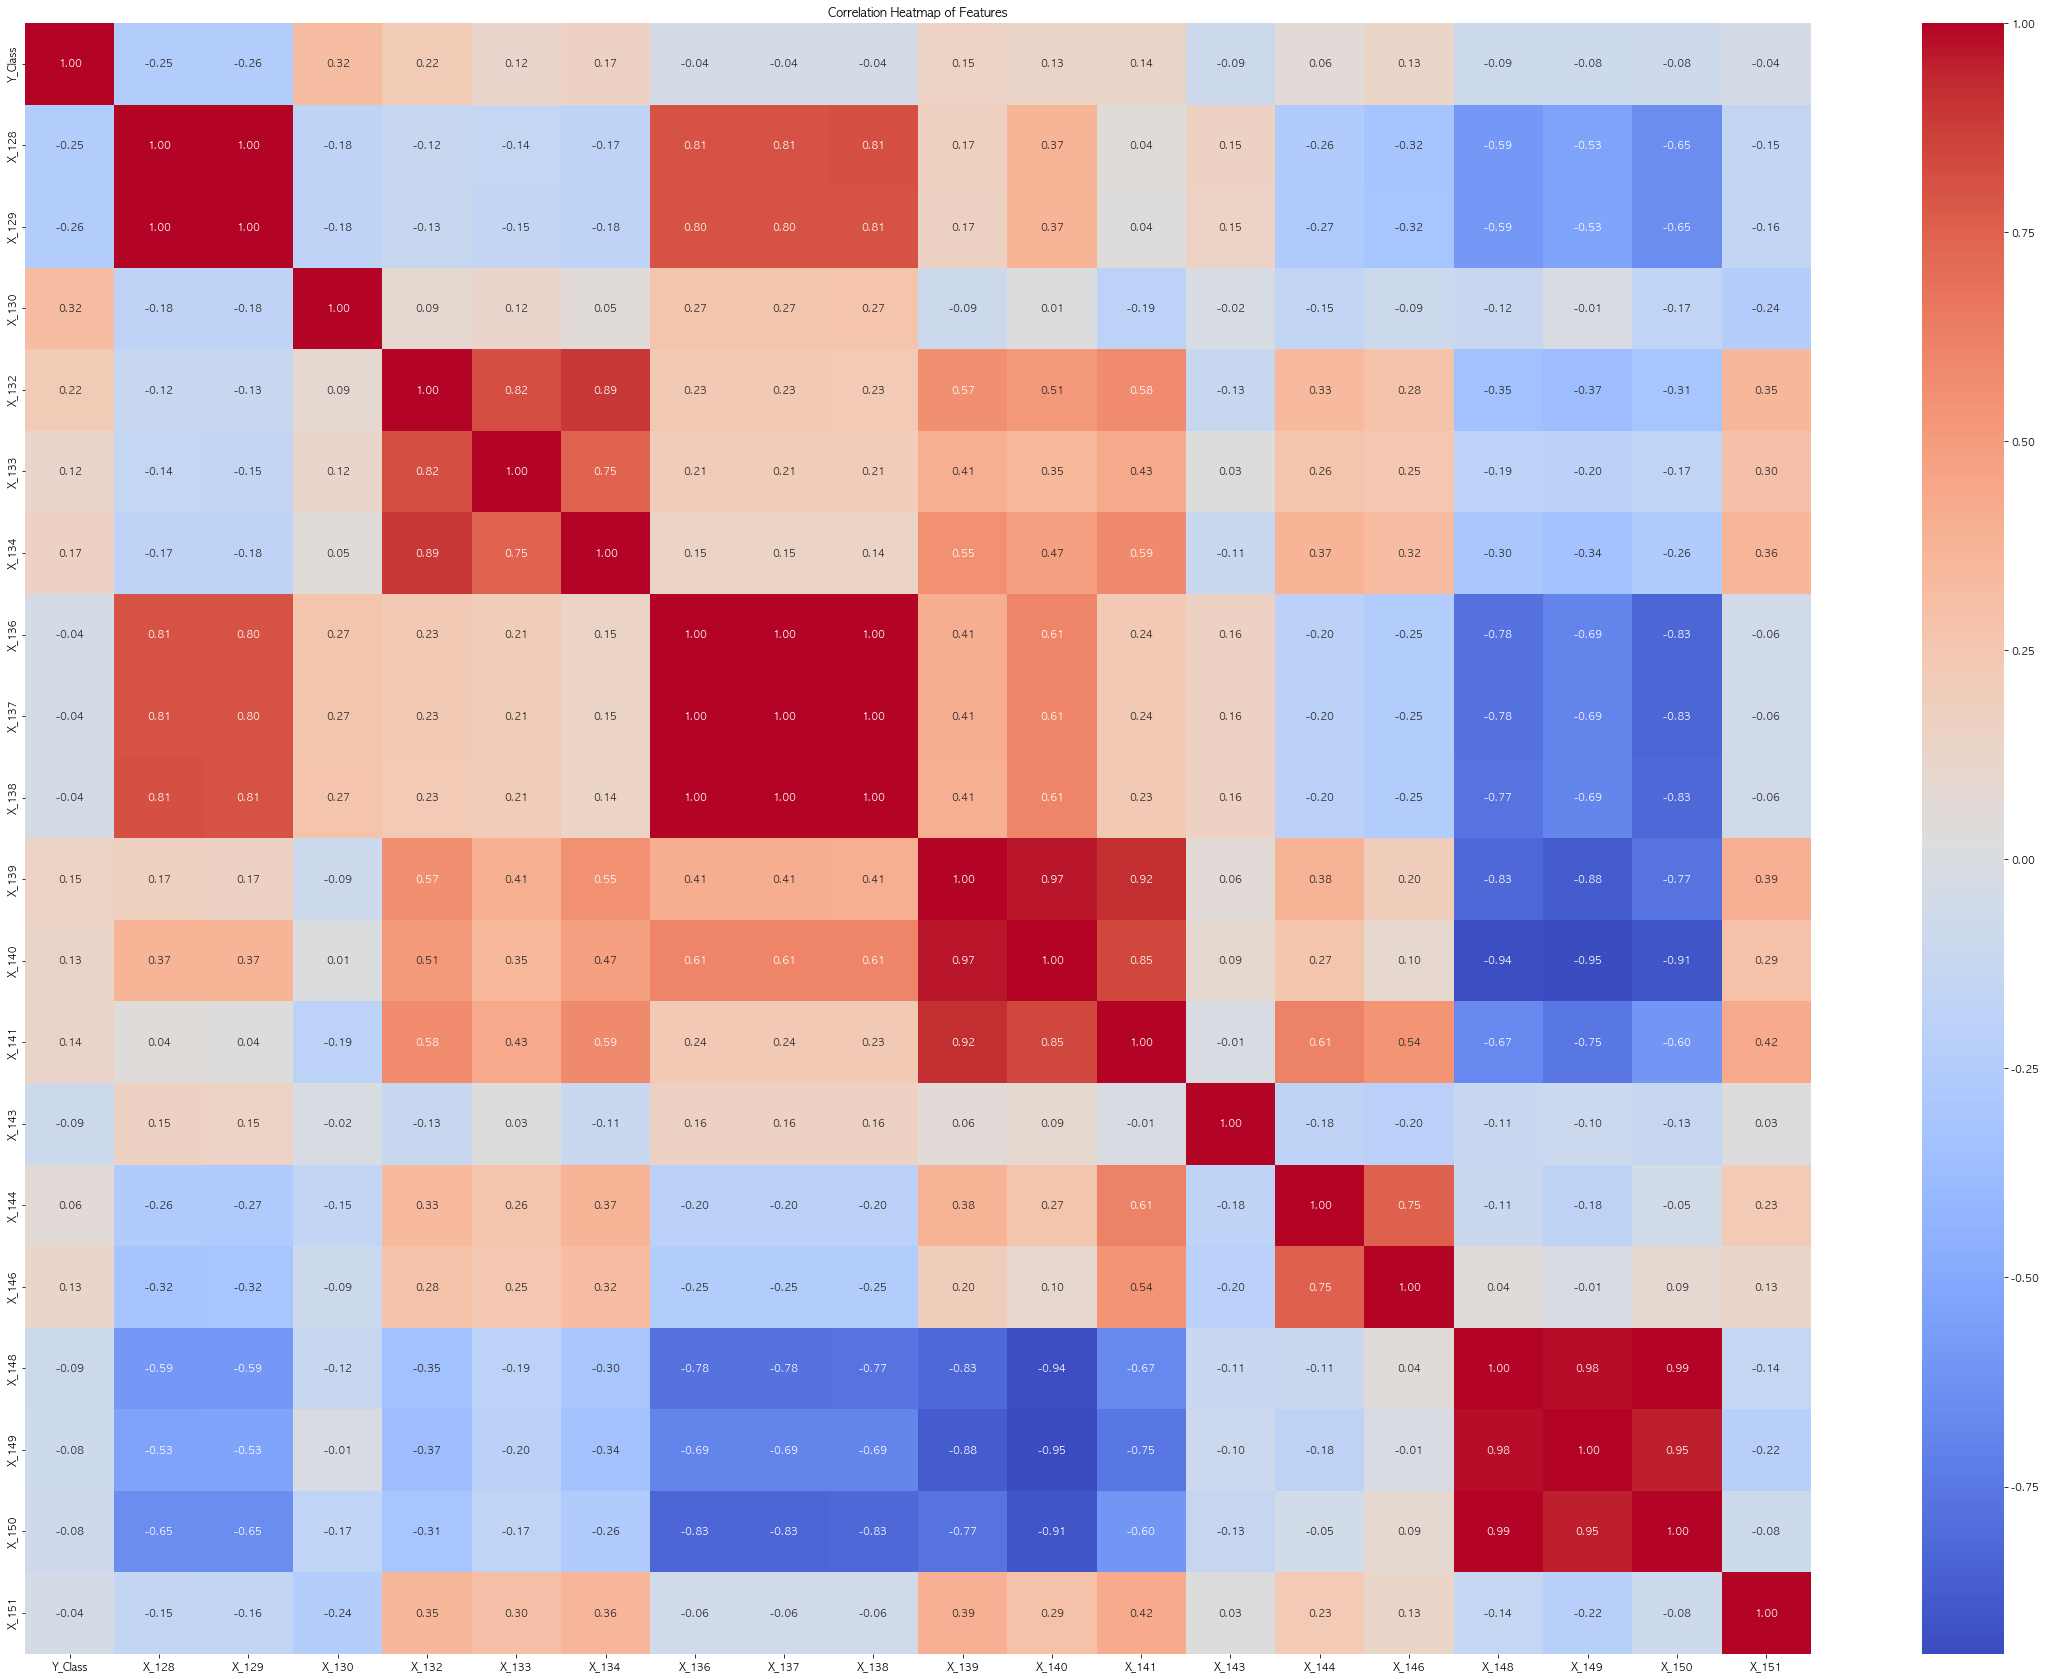

In [23]:
corr_matrix = df_comp.iloc[:,:20].corr()

# 히트맵 그리기
plt.figure(figsize=(40, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.savefig('./image/train_df_comp_mode_20.png')
plt.show()

In [24]:
df_comp2 = pd.concat([train_a[['Y_Class']],train_amedi], axis = 1)

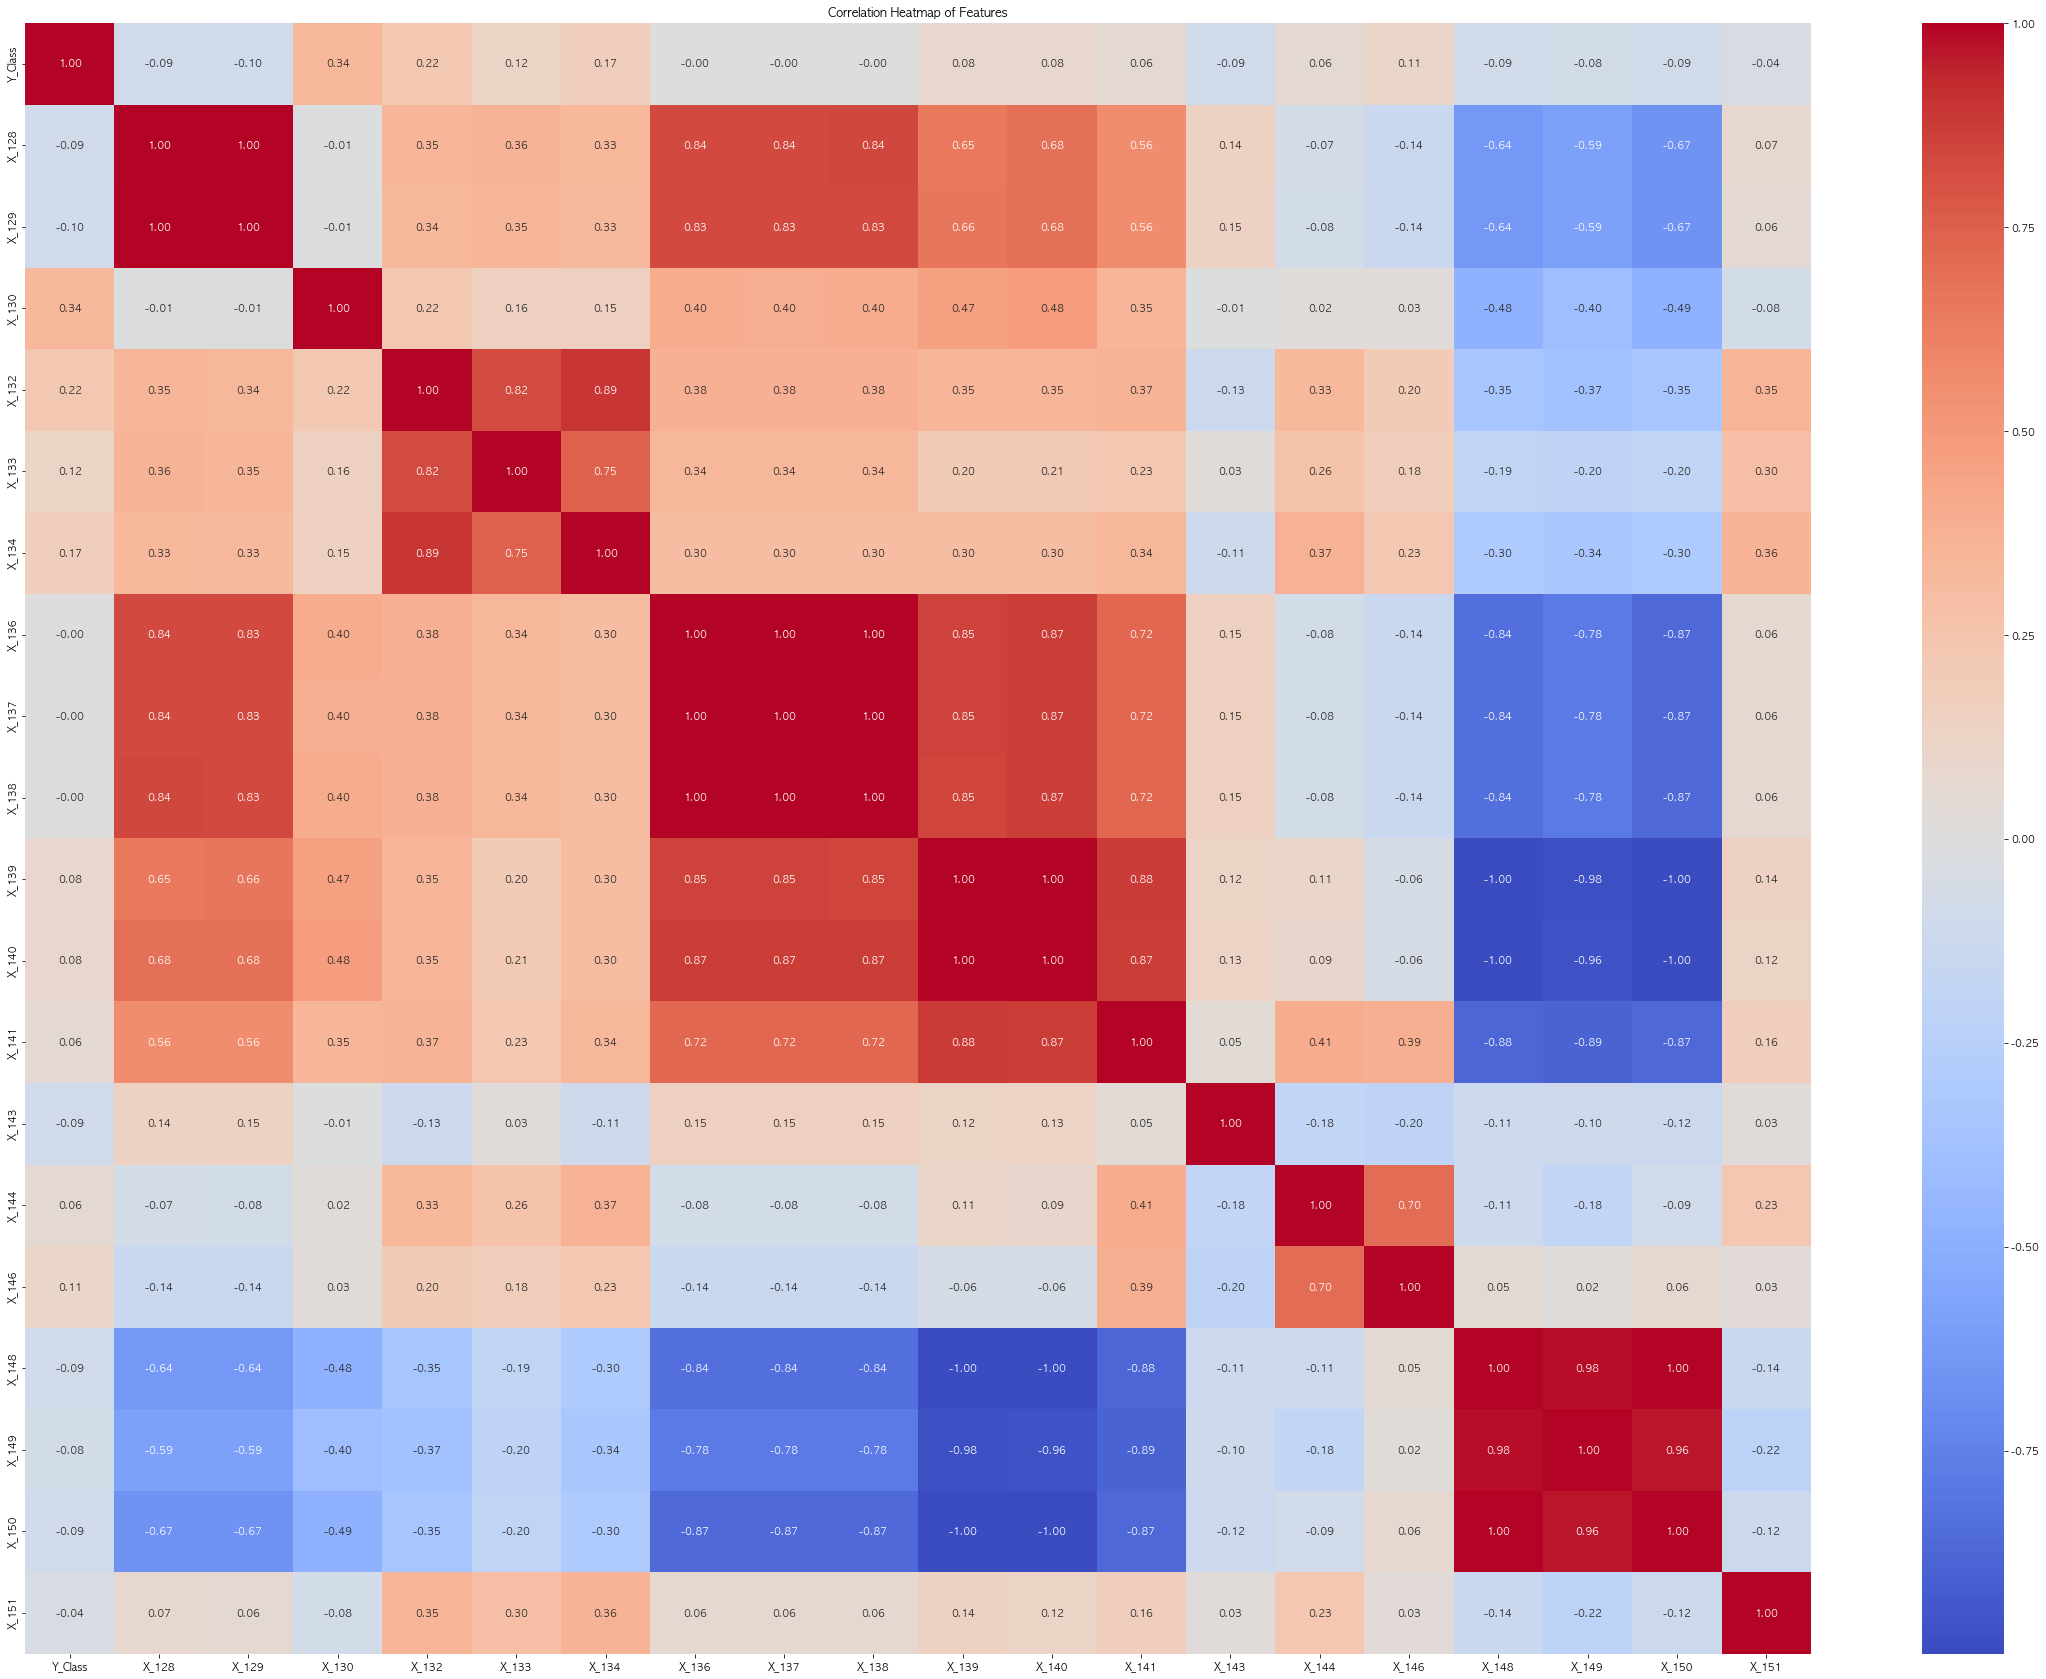

In [25]:
corr_matrix = df_comp2.iloc[:,:20].corr()

# 히트맵 그리기
plt.figure(figsize=(40, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.savefig('./image/train_df_comp_medi_20.png')
plt.show()

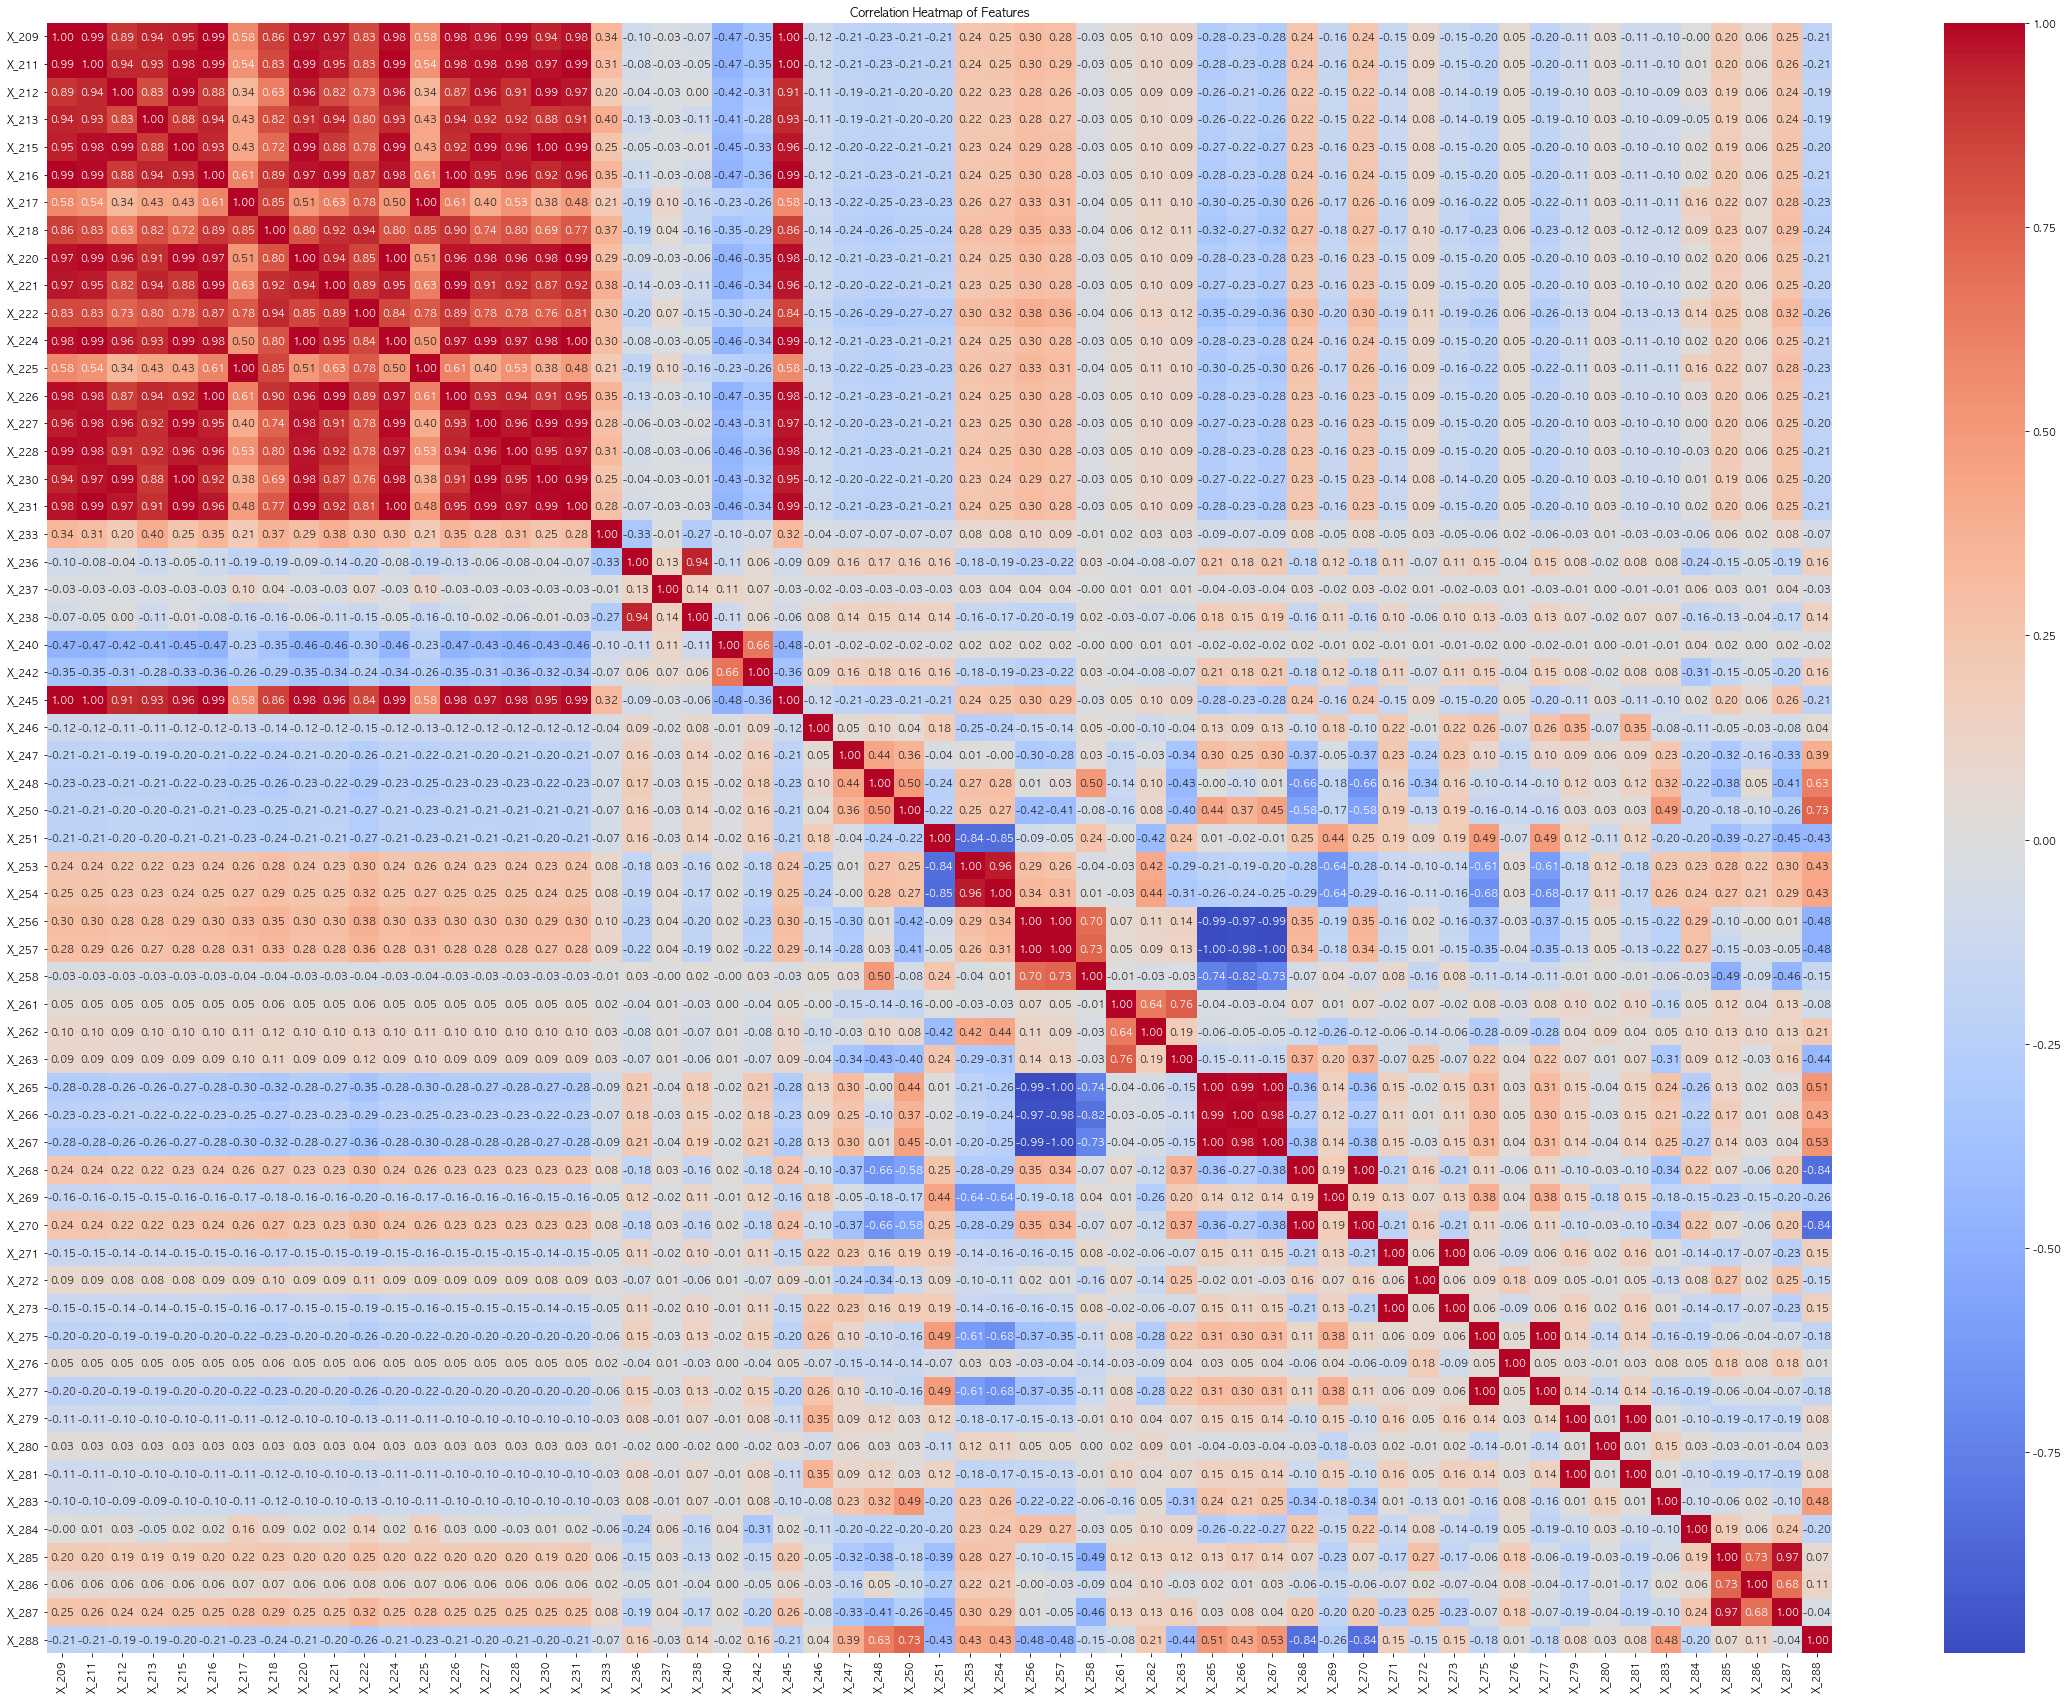

In [39]:
corr_matrix = train_amode.iloc[:,61:120].corr()

# 히트맵 그리기
plt.figure(figsize=(40, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.savefig('./image/train_amode2_120.png')
plt.show()

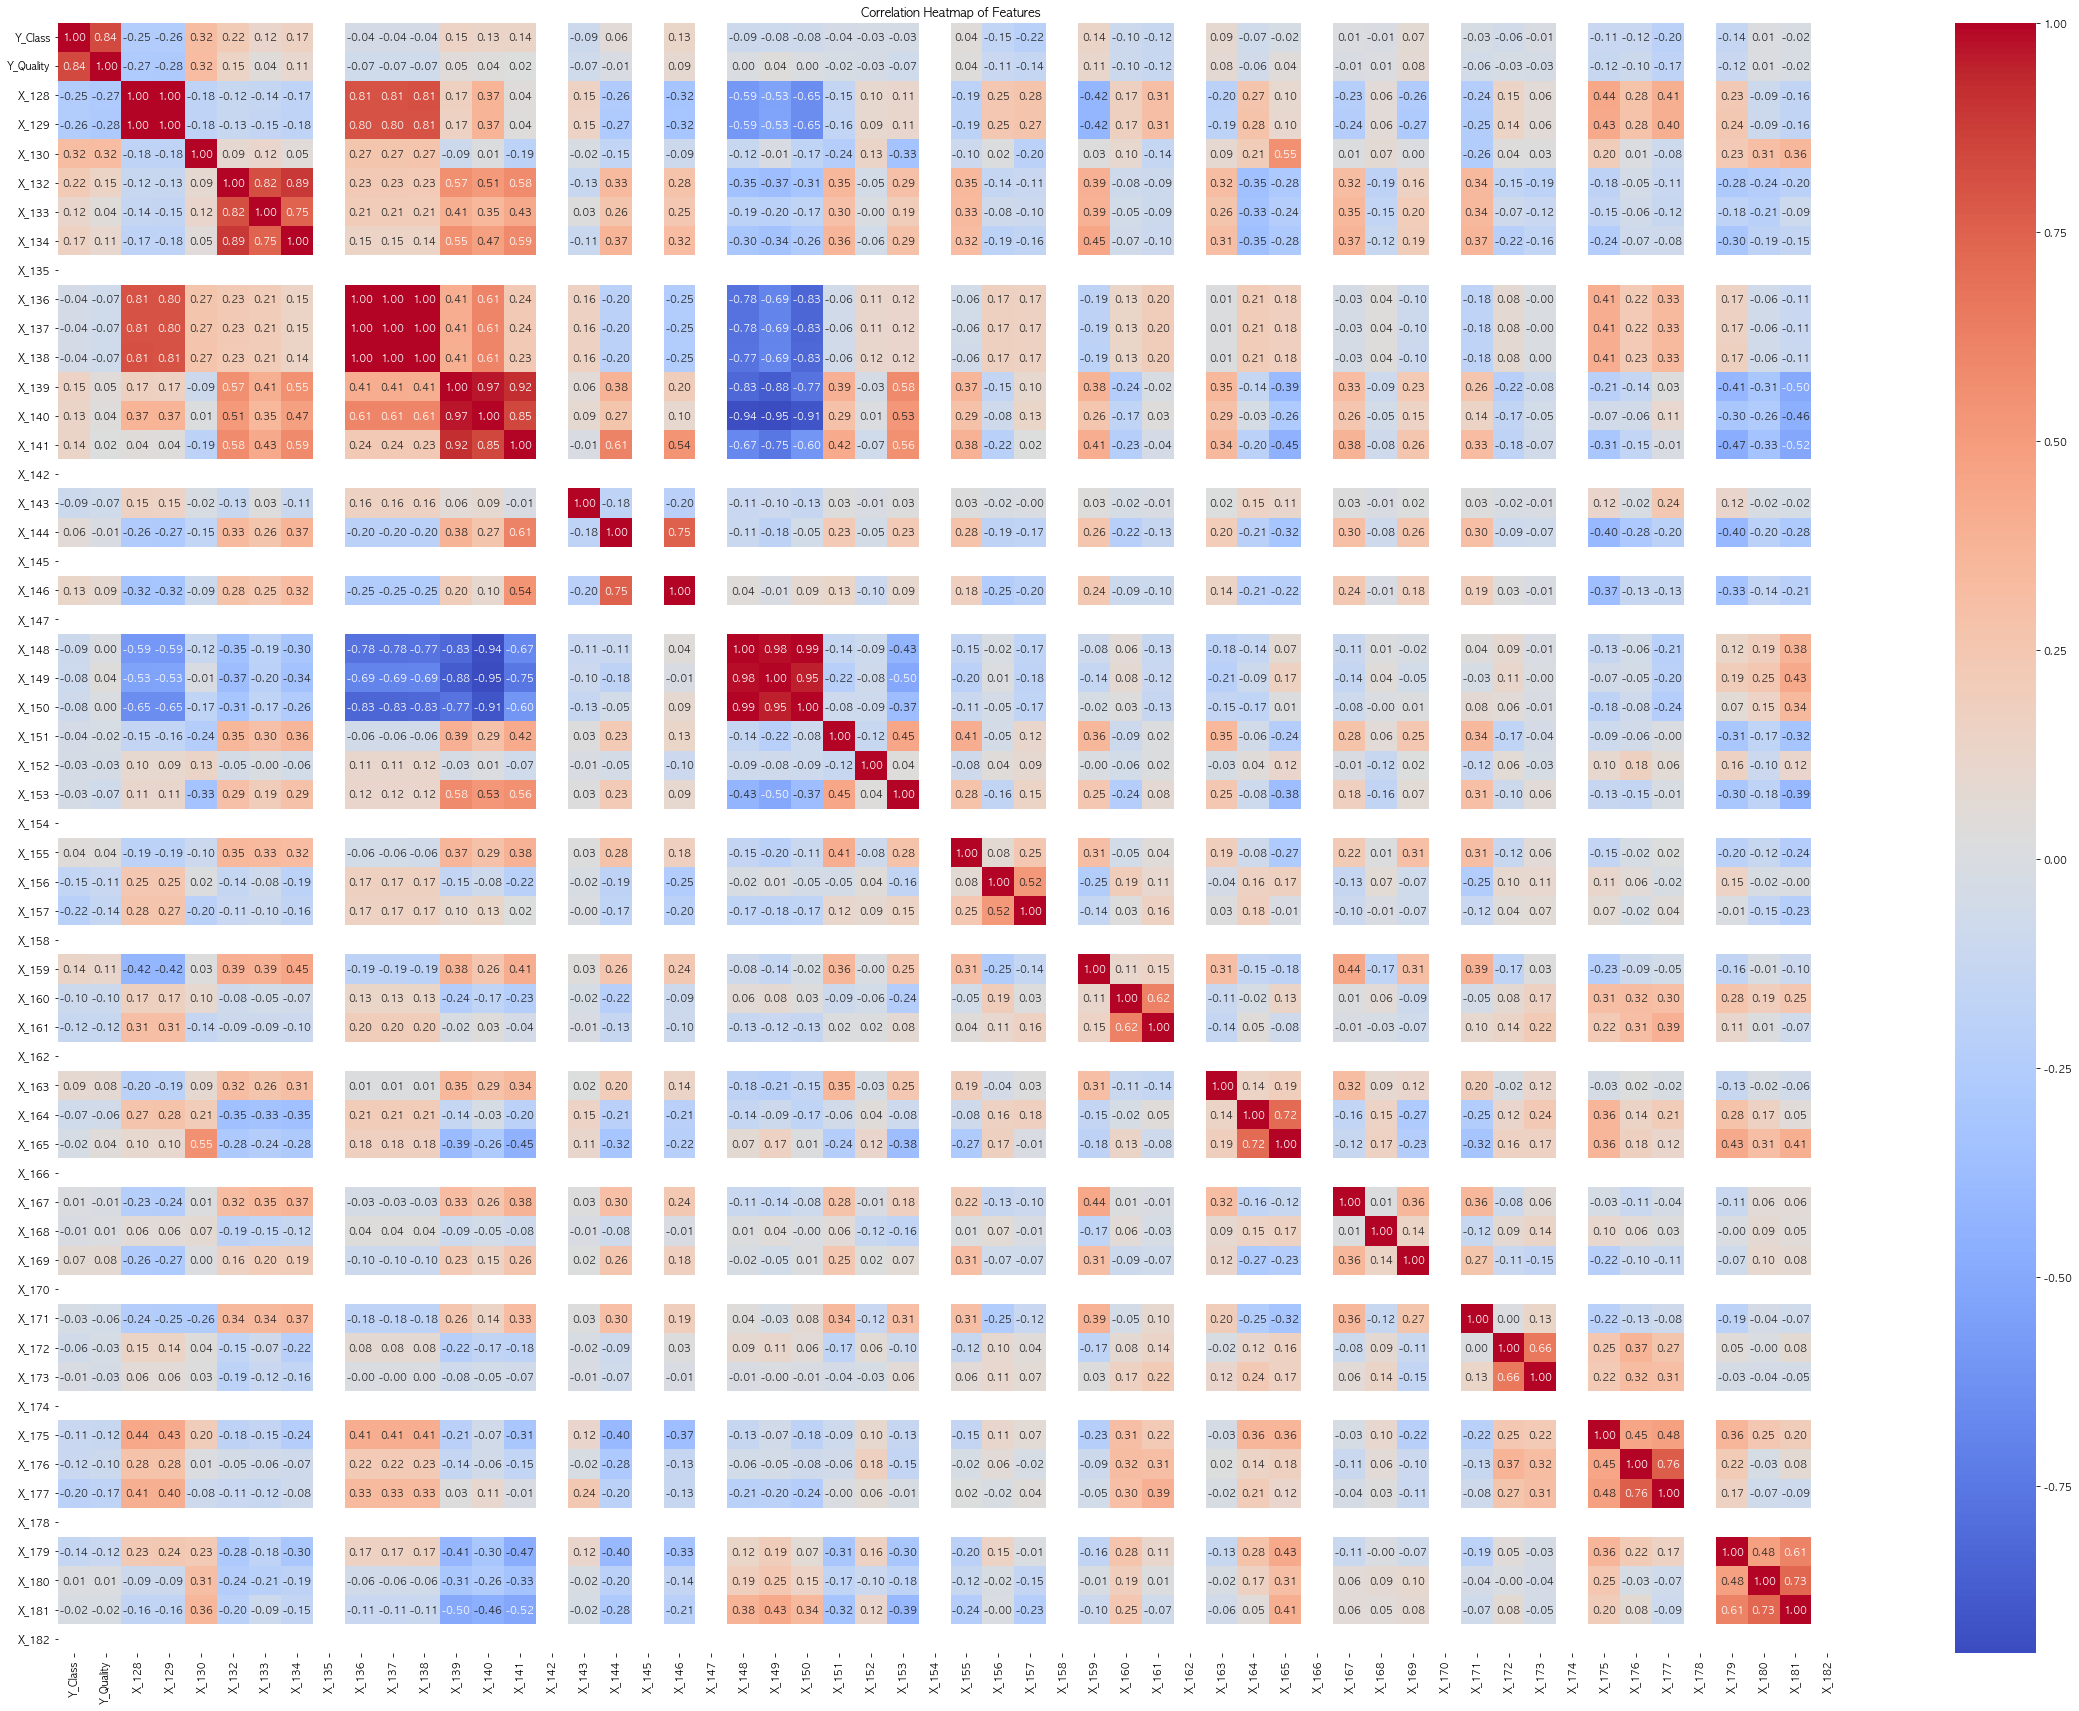

In [24]:
corr_matrix = train_amedi.iloc[:,:60].corr()

# 히트맵 그리기
plt.figure(figsize=(40, 30))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.savefig('./image/train_amedi_60.png')
plt.show()

최빈값과 중앙값으로 채운 히트맵은 비슷한 구조를 보이고 있습니다.

여기서 추가적으로 한 컬럼에 같은 값만 들어가서 결과 예측에 도움이 되지 않는 변수들을 삭제해야 합니다.